<a href="https://colab.research.google.com/github/alina-bogdanovskaya/Algorithms-and-Data-Structures-Python-/blob/lesson8/Lesson8_task3_dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Написать программу, которая обходит не взвешенный ориентированный граф без петель, в котором все вершины связаны, по алгоритму поиска в глубину (Depth-First Search).

Примечания:

a. граф должен храниться в виде списка смежности;

b. генерация графа выполняется в отдельной функции, которая принимает на вход число вершин.

In [7]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from random import randint

In [8]:
def generate_acyclic_graph(n):
  my_graph = [[0] * n for _ in range(n)]
  my_graph_list = []
  
  for i in range(n):
    for j in range(n):

      if j == i:
        continue

      if my_graph[j][i] == 0:
        my_graph[i][j] = randint(0, 1)
  
  for i in range(n):
    for j in range(n):

      if my_graph[j][i] == 1:
        my_graph_list.append((i,j))

  return my_graph_list
      

In [9]:
graph_to_plot = generate_acyclic_graph(10)
graph_to_plot

[(0, 4),
 (0, 7),
 (2, 1),
 (2, 9),
 (3, 1),
 (3, 5),
 (3, 9),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 6),
 (5, 0),
 (5, 1),
 (6, 1),
 (6, 3),
 (6, 7),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 5),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 5),
 (8, 7),
 (9, 0),
 (9, 1),
 (9, 4),
 (9, 5),
 (9, 7)]

In [10]:
def dfs(graph, start):
  is_visited = [False for _ in range(len(graph))]
  visited_nodes = []

  my_deq = deque([start])
  
  while len(my_deq) > 0:
    current_node = my_deq.pop()
    if is_visited[current_node]:
      continue
    
    visited_nodes.append(current_node)
    is_visited[current_node] = True
    adjacent_nodes = []
  
    for v in range(len(graph)):

      if graph[v][0] == current_node and not is_visited[graph[v][1]]:
        adjacent_nodes.append(graph[v][1])
    
    adjacent_nodes.reverse()
    my_deq.extend(adjacent_nodes)

  return visited_nodes


In [11]:
start = int(input('Введите номер вершины: '))
print(f'Из вершины {start} можно добраться до следующих вершин: {dfs(graph_to_plot, start)}')

Введите номер вершины: 8
Из вершины 8 можно добраться до следующих вершин: [8, 1, 2, 9, 0, 4, 3, 5, 6, 7]


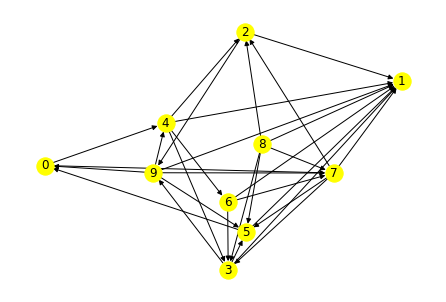

In [12]:
g = nx.DiGraph(directed=True)

for i in range(len(graph_to_plot)):
  g.add_edge(graph_to_plot[i][0], graph_to_plot[i][1])

nx.draw(g, node_color = 'yellow', with_labels = True)